**Importing All Required Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


**Importing the Dataset**

In [ ]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
df=pd.read_csv(r"/content/Income_data.csv",names=columns,skiprows=1)

**Exploring the Dataset**

In [ ]:
df.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        30725 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        30718 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           31978 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Getting some basic mathematical info about data

In [ ]:
df.describe()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Checking for null values

In [ ]:
df.isnull().sum()

Age                    0
Work Class          1836
Final Weight           0
Education              0
Education Number       0
Marital Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital Gain           0
Capital Loss           0
Hours per Week         0
Country              583
Income                 0
dtype: int64

**Correlation matrix between attributes**

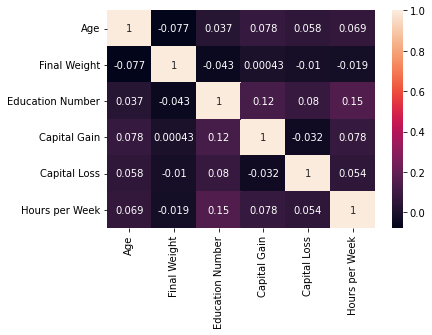

In [ ]:
sns.heatmap(df.corr(),annot=True)

We can see that there are no null values in dataset. Now we will check the value counts.

In [ ]:
for i in df.columns:
  print("Value counts of "+i,end="\n\n")
  print(df[i].value_counts(),end="\n\n\n\n\n")

Value counts of Age

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64




Value counts of Work Class

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work Class, dtype: int64




Value counts of Final Weight

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: Final Weight, Length: 21648, dtype: int64




Value counts of Education

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413

**Transformating Data**

**Age Column :** we can see that age has integer values  and between 17 and 90.
so nothing has to be changed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


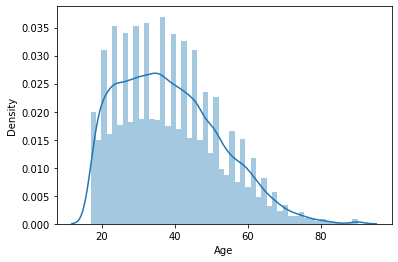

In [ ]:
sns.distplot(df.Age)

**Work class Column :** there are nan values so we need to replace it with mode. 

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

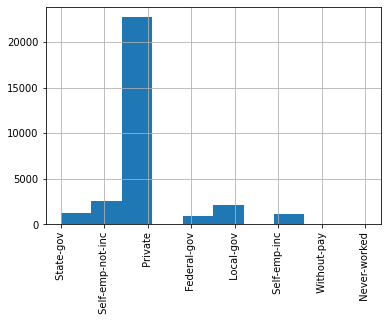

In [ ]:
# for i,j in enumerate(df["Work Class"]):
#    if not re.match(r"[A-Za-z]*",j):
#       print(j)
#       df.loc[i]["Work Class"]=np.nan
df["Work Class"].hist()
plt.xticks(rotation=90)

In [ ]:
most_frequent_category=df["Work Class"].mode()[0]
df["Work Class"].fillna(most_frequent_category,inplace=True)

**Final Weight Column :** the value count in final weight column is too high so we can exclude this column.

In [ ]:
df.drop(["Final Weight"],inplace=True,axis=1)

**Education Column :** From value counts we can see that Education and Education-Number column are both same but education is having categorical data of standard and Education-Number is having numerical data so we can drop the Education column which is categorical.

In [ ]:
df.drop(["Education"],inplace=True,axis=1)

**Occupation Column :** we have to fill values having Nan with mode

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


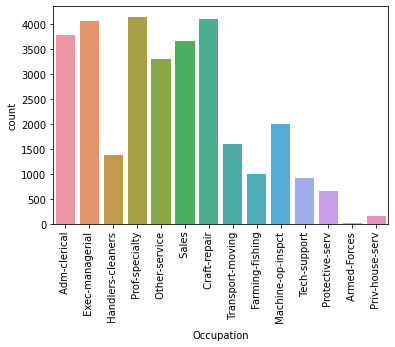

In [ ]:
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()
most_frequent_cat=df["Occupation"].mode()[0]
df["Occupation"].fillna(most_frequent_cat,inplace=True)

**Country column :** We can observe that united states is maximum occuring so we are replacing all other as Other_Country.

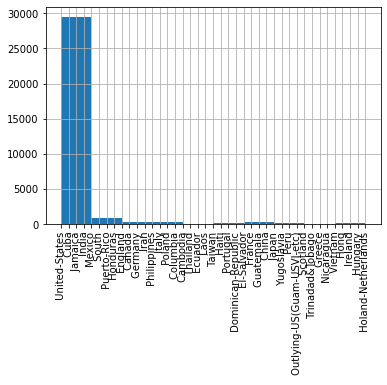

In [ ]:
df["Country"].hist()
plt.xticks(rotation=90)
plt.show()

In [ ]:
most_frequent_cat=df["Country"].mode()[0]
df["Country"].fillna(most_frequent_cat,inplace=True)

In [ ]:
arr=list(df["Country"].unique())
arr=arr[1:]
df["Country"].replace(arr,"Other_Countries",inplace=True)

After replacing with all other countries other than united_states

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


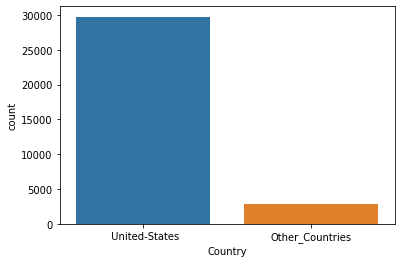

In [ ]:
sns.countplot(df["Country"])
plt.show()

**Label Encoding the Income column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


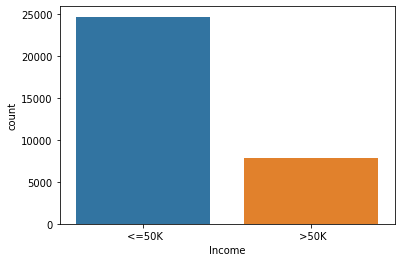

In [ ]:
sns.countplot(df["Income"])
plt.show()

In [ ]:
labelEncoder = LabelEncoder()
df['Income'] = labelEncoder.fit_transform(df['Income'])

After label Encoding

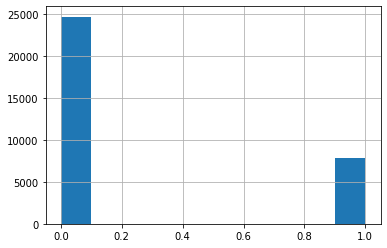

In [ ]:
df["Income"].hist()

**Exploratory Data Analysis**

**Visualising the  value counts of all the columns with count plots**

Count plot for Age


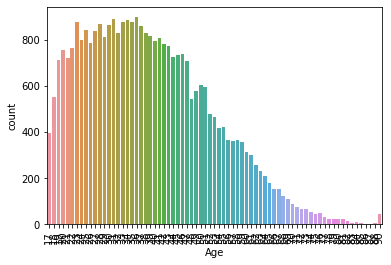





Count plot for Work Class


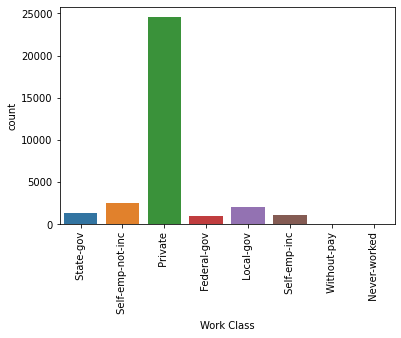





Count plot for Education Number


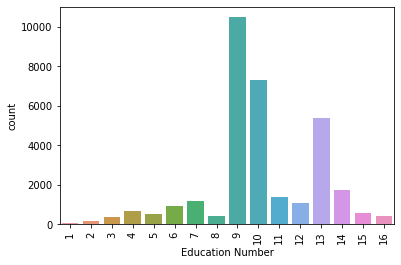





Count plot for Marital Status


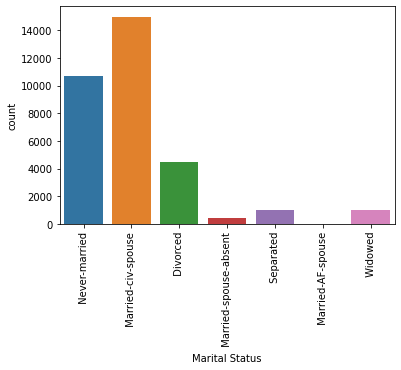





Count plot for Occupation


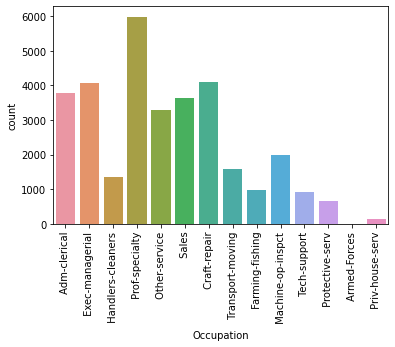





Count plot for Relationship


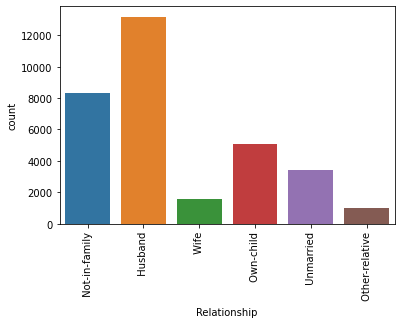





Count plot for Race


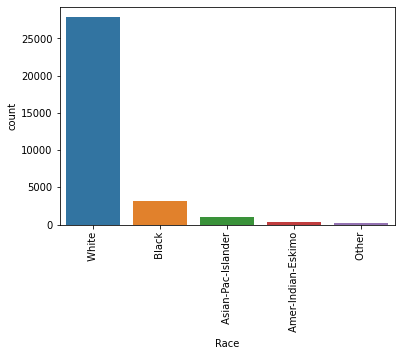





Count plot for Sex


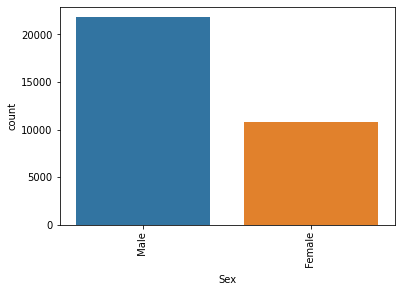





Count plot for Capital Gain


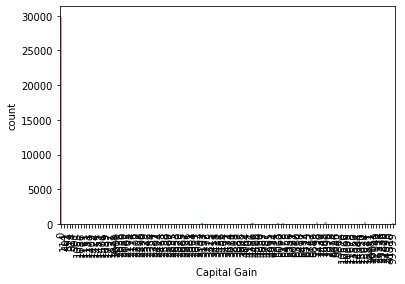





Count plot for Capital Loss


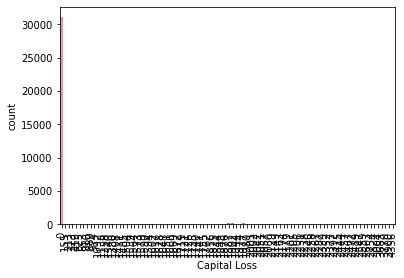





Count plot for Hours per Week


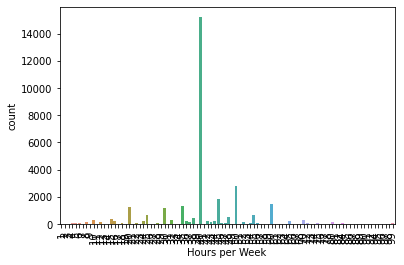





Count plot for Country


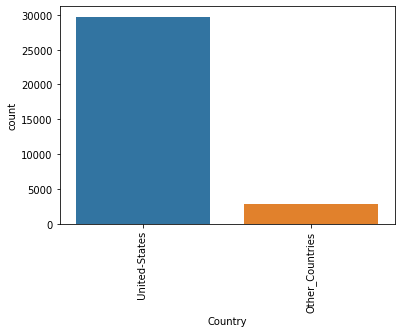





Count plot for Income


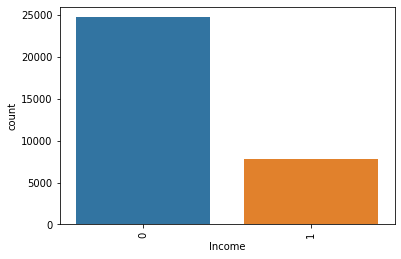

In [ ]:
for i in df.columns:
  print("Count plot for "+i)
  sns.countplot(x=df[i],data=df)
  plt.xticks(rotation=90)
  plt.show()
  print("\n\n\n")

**Pair Plot**

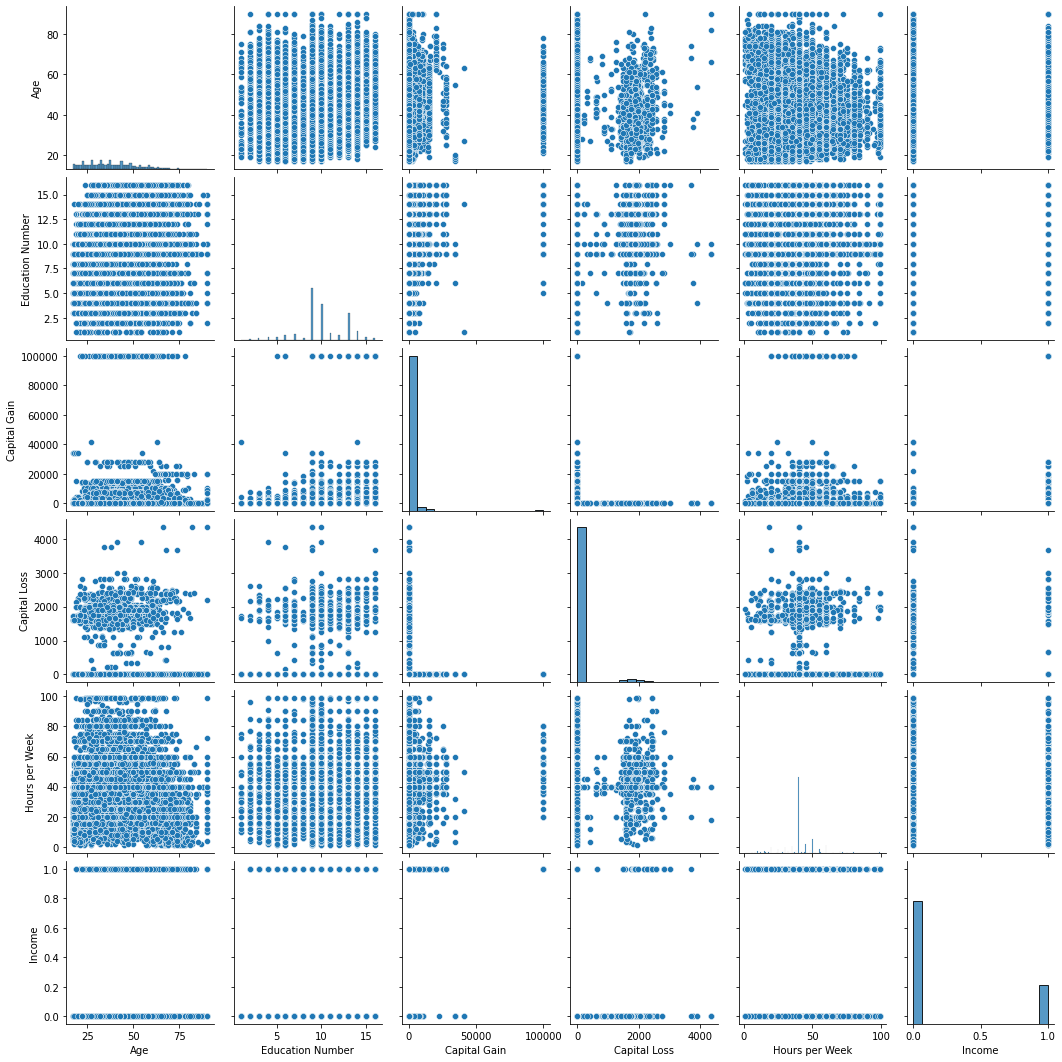

In [ ]:
sns.pairplot(df)
plt.show()

**Encoding the categorical values**

In [ ]:
target=df["Income"]
new_df=df.drop(["Income"],axis=True)
new_df=pd.get_dummies(new_df)

**Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.30, random_state = 10)

In [ ]:
classifiers = [GaussianNB(),  
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 10), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []
confu=[]

In [ ]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confu.append(cm)

Gaussian Naive Bayes:
F1 score: 0.65
Decision Tree Classifier:
F1 score: 0.62
Random Forest Classifier:
F1 score: 0.66
Gradient Boosting Classifier:
F1 score: 0.67


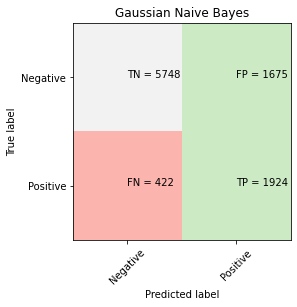

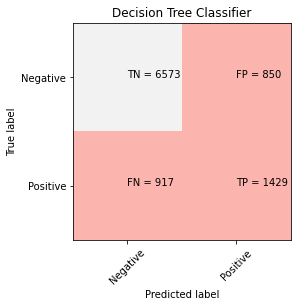

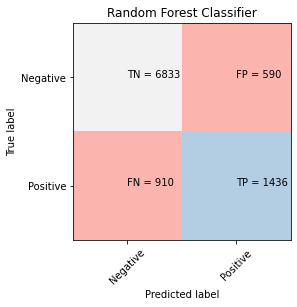

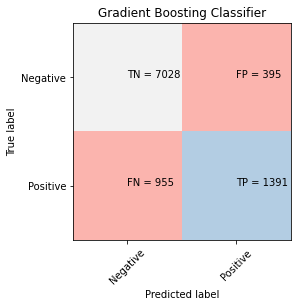

In [ ]:
for v in range(len(classifier_names)):
  plt.clf()
  plt.imshow(confu[v], interpolation='nearest', cmap=plt.cm.Pastel1)
  classNames = ['Negative','Positive']
  plt.title(classifier_names[v])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str((confu[v])[i][j]))
  plt.show()


In [ ]:
accuracies

[78.53413860169925, 81.9121711536493, 84.64530658204524, 86.18077592384073]